# Example 4. Tree algorithms
---

Tree algorithms are the different learning machines from the linear analystic algorithms, i.e. it is not simply finding the weights which are for constructing a decision boundary or regression function. The algorithms are based on tree sturcture to classify the data, they have: **decision tree**, **boosted decision tree** and **random forests**. Althought the algorithm is not analystic, they have interpretability. Base on the tree structure, the clasification is made by multi-senquence of decision branches from root to leaves, so called decision tree. The machine can learn the decisions by **information gain** (IG) in each branch and go very deep until only leaves left, i.e. IG is the objective function of tree algorithms. The defination of IG is based on the impurity changes from parent node to childen nodes, i.e. the more impurity changes got, the more imformation gained. The IG is defined as

$$
\begin{equation}
IG(D_p, f)=\Delta I=I(D_p)-\sum_{j=1}^{m}\frac{N_j}{N_p}I(D_j)\ ,
\end{equation}
$$

where $D_{p}$ and $D_{j}$ are the dataset of parent node and childen nodes, respectively; $f$ is the input feature for making decision; $I$ is the impurity; $m$ is the number of decision branch. If $m=2$, the decision tree is called **binary decision tree**. However, there are three ways of impurity caculation: **Gini impurity** $(I_{G})$, **entropy** $(I_{E})$ and **classification error** $(I_{\epsilon})$. They are formed by the probabilties of classification $p(i|t)$, where $t$ is a certain node. The defination of **Gini impurity** is as

$$
\begin{equation}
I_{G}(t)=\sum_{i=1}^{c}p(i|t)\left(1-p(i|t)\right)\ ,
\end{equation}
$$

where $c$ is the number of classification. The defination of **entropy** is as 

$$
\begin{equation}
I_{E}(t)=\sum_{i=1}^{c}p(i|t)\log_{2}{p(i|t)}\ .
\end{equation}
$$

The defination of **classification error** is as

$$
\begin{equation}
I_{\epsilon}(t)=1-\max{\left\{p(i|t)\right\}}\ .
\end{equation}
$$

When $p(i|t)$ is either 0 (whole data is not in certain class) or 1 (whole data is in certain class), the $I$ will be 0 and means the inpurity is pure and the classification is done. Thus, when comparing the impurity changes between parent node and the sum of childen nodes, the tree build and learn the higher information-gain decisions in each branch.

Following shows the behavior of each impurity caculation in binary decision case:

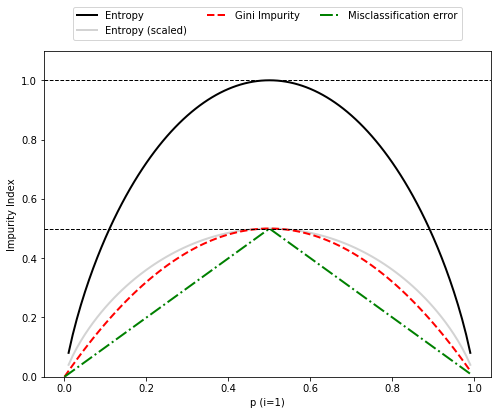

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)
def error(p):
    return 1 - np.max([p, 1-p])
x = np.arange(0., 1., 0.01)

ent    = [entropy(p) if p !=0 else None for p in x] # log2 can't input 0
ent_sc = [e*0.5 if e else None for e in ent]
err = [error(p) for p in x] # max function can't for list

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, ent_sc, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p (i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Import data

In [1]:
from sklearn import datasets
import numpy as np

from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )
## The standarization has no difference in tree algorithms
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

## 1. Decision tree classification with Sklearn

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

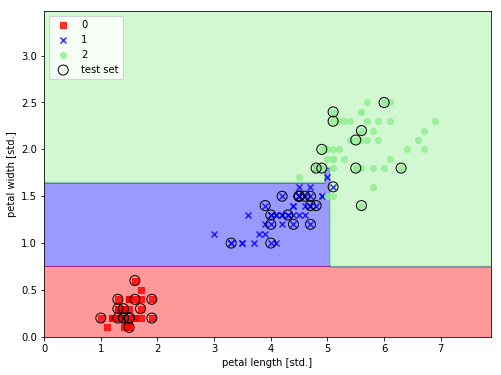

In [12]:
plt.figure(figsize=(8, 6))

X_combined = np.vstack( (X_train, X_test) )
y_combined = np.hstack( (y_train, y_test) )
plot_decision_regions( X=X_combined, y=y_combined, classifier=tree, test_idx=range(105,150) )
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

In [10]:
#import graphviz
#from sklearn.tree import export_graphviz
#dot_data = export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])
#graph = graphviz.Source(dot_data) 

### 1.1 Turning the depth of tree

In [21]:
N_d = 10
trees = []
for i in range(N_d):
    trees.append(DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0))
    trees[i].fit(X_train, y_train)

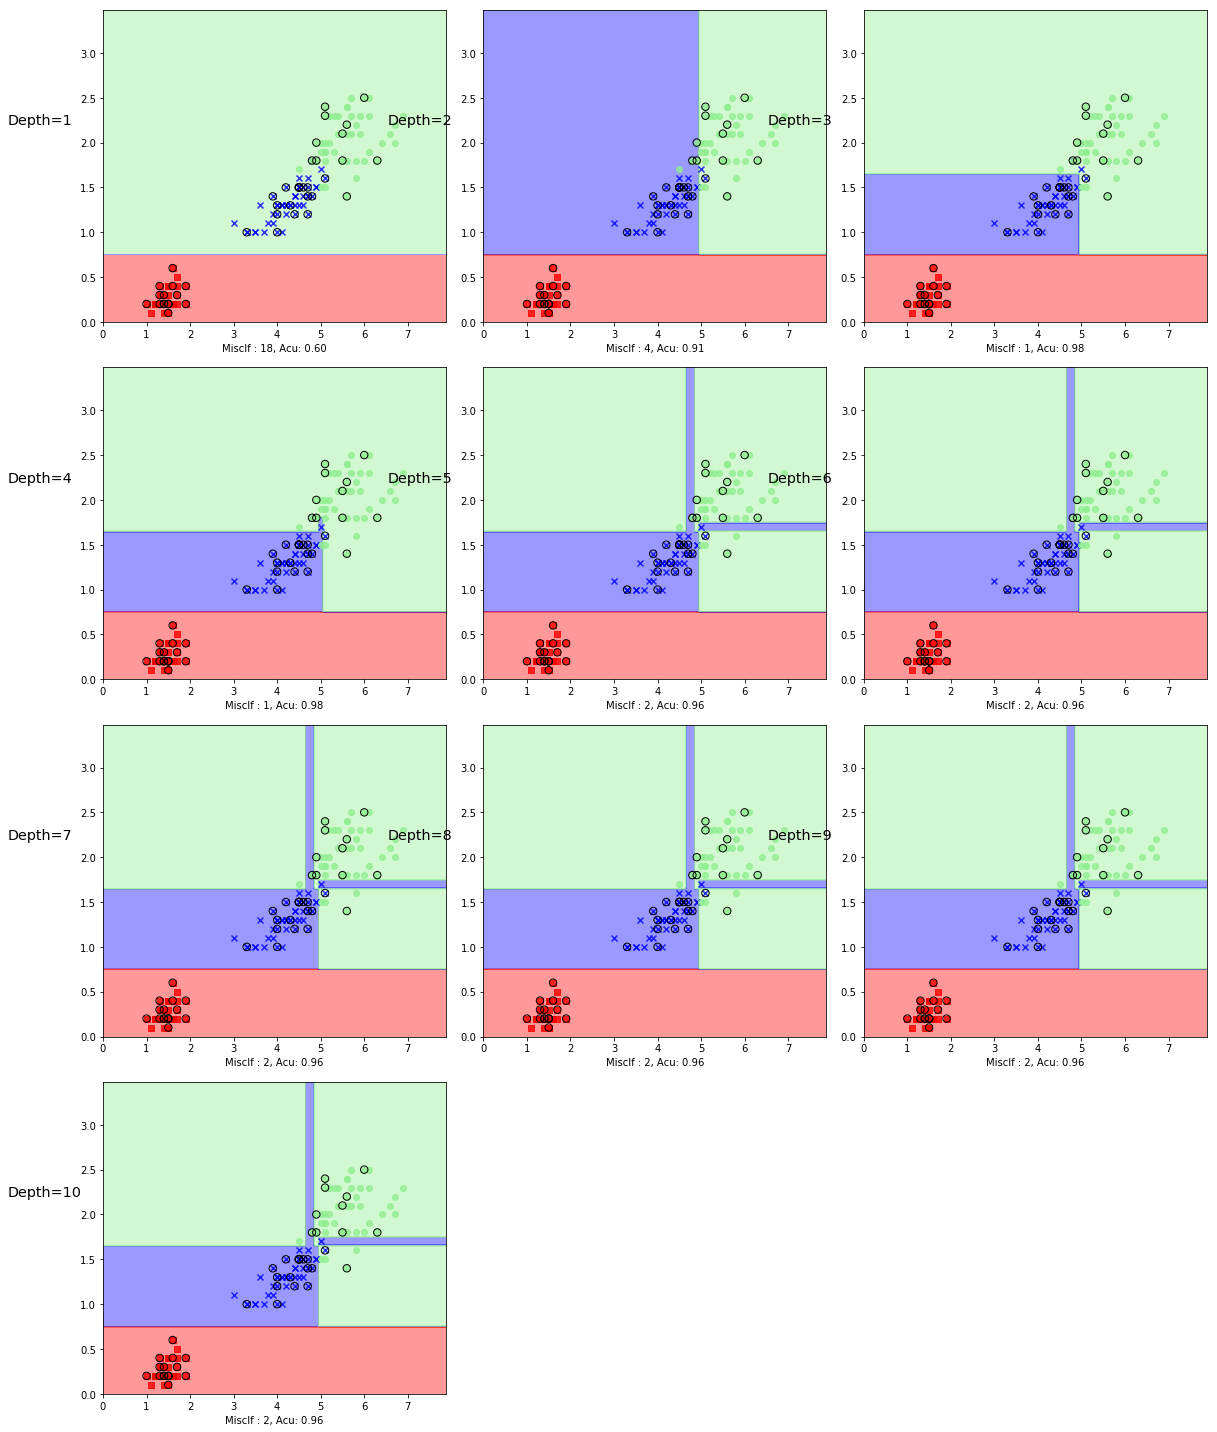

In [25]:
r = int(N_d/3)
fig = plt.figure(figsize=(16, N_d*2))
for i in range(N_d):
    fig.add_subplot( r if N_d%3 is 0 else r+1, 3, i+1 )
    plot_decision_regions( X=X_combined, y=y_combined, classifier=trees[i], test_idx=range(105,150), highlightSize=55 )
    plt.text(-2.2, 2.2, 'Depth='+str(i+1), fontsize='x-large')
    y_pred_ = trees[i].predict(X_test)
    plt.xlabel('Misclf : %d, Acu: %.2f'%( (y_test != y_pred_).sum(), trees[i].score(X_test, y_test) ) )
plt.tight_layout()
plt.show()